In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#columnas =['PedidoId', 'Cantidad', 'MontoProd', 'MontoFinalProd', 'Producto','ID CLIENTE', 'Ciudad', 'Fecha']
df=pd.read_excel("C:/Users/HP/Desktop/TESIS/TESIS EXCEL/DatosNDA5.xlsx")

In [ ]:
#df['Fecha']=pd.to_datetime(df['Fecha'] )

In [3]:
df

,PedidoId,Cantidad,PrecioUnitario,MontoFinal,CodigoProducto,Producto,Fecha,Departamento,Grandes_Categorias,Id_Cliente,Tipo_pedido,Dia_Semana
0,100,1,34,34,84172297,Acondicionador Dove Control Caida 400Ml,2020-03-28,Cochabamba,Personal Care,71494844,Familiar,Sábado
1,110,1,34,34,84172297,Acondicionador Dove Control Caida 400Ml,2020-03-28,Cochabamba,Personal Care,70757310,Familiar,Sábado
2,148,1,34,34,84172297,Acondicionador Dove Control Caida 400Ml,2020-03-29,La Paz,Personal Care,77233662,Familiar,Domingo
3,182,2,34,68,84172297,Acondicionador Dove Control Caida 400Ml,2020-03-29,Santa Cruz,Personal Care,67899785,Familiar,Domingo
4,216,1,34,34,84172297,Acondicionador Dove Control Caida 400Ml,2020-03-29,La Paz,Personal Care,76706668,Familiar,Domingo
...,...,...,...,...,...,...,...,...,...,...,...,...
795989,4200,1,10,10,6777630891,Women Deo Soft Solid Clas12X48G,2020-04-22,Cochabamba,Personal Care,1630,Multifamiliar,Miércoles
795990,4324,2,10,20,6777630891,Women Deo Soft Solid Clas12X48G,2020-04-23,La Paz,Personal Care,1636,Multifamiliar,Jueves
795991,4594,1,10,10,6777630891,Women Deo Soft Solid Clas12X48G,2020-04-23,Santa Cruz,Personal Care,1662,Multifamiliar,Jueves
795992,23529,2,10,20,6777630891,Women Deo Soft Solid Clas12X48G,2020-07-12,Tarija,Personal Care,1828,Multifamiliar,Domingo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795994 entries, 0 to 795993
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PedidoId            795994 non-null  int64         
 1   Cantidad            795994 non-null  int64         
 2   PrecioUnitario      795994 non-null  int64         
 3   MontoFinal          795994 non-null  int64         
 4   CodigoProducto      795994 non-null  int64         
 5   Producto            795994 non-null  object        
 6   Fecha               795994 non-null  datetime64[ns]
 7   Departamento        795994 non-null  object        
 8   Grandes_Categorias  795994 non-null  object        
 9   Id_Cliente          795994 non-null  object        
 10  Tipo_pedido         795994 non-null  object        
 11  Dia_Semana          795994 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 72.9+ MB


In [ ]:
df.isna().sum()

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df['Departamento'].value_counts()

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

col_features= ['Cantidad','MontoFinal']
x = MinMaxScaler().fit_transform(df[col_features])

kmeans= KMeans(init='k-means++', n_clusters=4, random_state=15).fit(x)
df['kmeans'] = kmeans.labels_

In [ ]:
df

In [ ]:
sns.scatterplot(data=df, x="Cantidad", y="MontoFinal", hue='kmeans', palette='Accent')

In [ ]:
len(df['Id_Cliente'].unique())

In [ ]:
len(df['PedidoId'].unique())

In [ ]:
df

In [5]:
dfFecha=df

In [6]:
dfFecha=df.groupby(by="Fecha").sum()

#filt = (df['Cantidad']<1000) &(df['MontoFinalProd']<5000)
#df=df.loc[filt]
dfFecha=dfFecha.reset_index()
dfFecha

,Fecha,PedidoId,Cantidad,PrecioUnitario,MontoFinal,CodigoProducto
0,2020-03-28,47848,794,12451,15413,22657770571
1,2020-03-29,316804,1966,29673,37271,55788031513
2,2020-03-30,2551377,1302,19844,23705,38304931339
3,2020-03-31,259227,721,11101,14033,19677976476
4,2020-04-01,3690291,661,9817,12385,23440012979
...,...,...,...,...,...,...
239,2020-11-22,71425536,2557,53095,65669,70319671646
240,2020-11-23,70738301,2790,49889,66330,65583726644
241,2020-11-24,3729094,131,2656,3157,3683905092
242,2020-11-25,783824,32,476,650,560001471


In [7]:
dfFecha.isna().sum()

Fecha             0
PedidoId          0
Cantidad          0
PrecioUnitario    0
MontoFinal        0
CodigoProducto    0
dtype: int64

<AxesSubplot:xlabel='Fecha', ylabel='MontoFinal'>

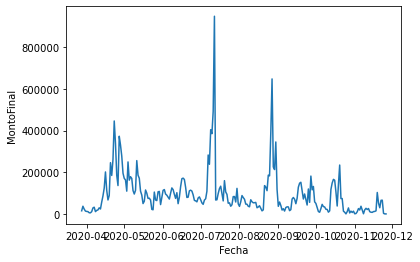

In [10]:
sns.lineplot(data=dfFecha, x="Fecha", y="MontoFinal")

<AxesSubplot:ylabel='MontoFinal'>

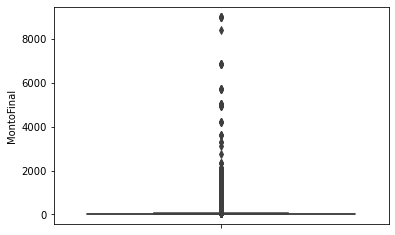

In [12]:
sns.boxplot(y=df['MontoFinal'])

In [ ]:
df.describe()

<AxesSubplot:ylabel='Cantidad'>

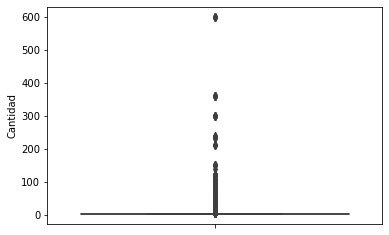

In [13]:
sns.boxplot(y=df['Cantidad'])

In [ ]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

col_features= ['Cantidad','MontoFinalProd']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[col_features])

kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)

kmeans.fit(scaled_features)

df['kmeans2'] = kmeans.labels_

In [ ]:
sns.scatterplot(data=df, x="Cantidad", y="MontoFinalProd", hue='kmeans2', palette='Accent_r')

In [ ]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)



In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df['MontoFinalProd']))
#print(z)
#type(z)
dfz= pd.DataFrame(z)
dfz

In [ ]:
#threshold = 3
#print(np.where(z > 3))
df=pd.concat([df, dfz], axis=1)
df

In [ ]:
df=df.rename(columns={0:'z'})

In [ ]:
#retirando los outliers
filtz=df['z']<3
df=df.loc[filtz]
df=df.drop(columns=['z'])
df=df.reset_index(drop= True)
df

In [ ]:
sns.scatterplot(data=df, x="Cantidad", y="MontoFinalProd")

In [ ]:
sns.boxplot(y=df['MontoFinalProd'])

In [ ]:
sns.boxplot(y=df['Cantidad'])

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

col_features= ['Cantidad','MontoFinalProd']
x = MinMaxScaler().fit_transform(df[col_features])

kmeans= KMeans(init='k-means++', n_clusters=4, random_state=15).fit(x)
df['kmeans'] = kmeans.labels_


In [ ]:
df

In [ ]:
sns.scatterplot(data=df, x="Cantidad", y="MontoFinalProd", hue='kmeans', palette='Accent_r')

In [ ]:
#df.to_excel(r'C:/Users/HP/Desktop/TESIS/EMPRESA_NDA/DATOS/DATOS_NDA.xlsx',sheet_name='hoja1')

In [ ]:
#import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#col_features= ['Cantidad','MontoFinalProd']
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(col_features)

#kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

#kmeans.fit(scaled_features)


kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()